**Install Required Libraries**

In [33]:
!pip install qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms pylatexenc

## Quantum Walk Simulation using Qiskit

In this notebook, we simulate a **quantum walk** using Qiskit. A quantum walk is the quantum counterpart of a classical random walk and plays an important role in quantum algorithms and quantum computing.
Unlike classical random walks where a walker occupies a definite state, quantum walks allow the walker to be in a superposition of multiple locations simultaneously, leading to distinct properties and potential for quantum computation

We will:
- Define a quantum circuit to simulate a quantum walk.
- Apply a coin operator and a shift operator over several steps.
- Use Qiskit Aer's simulator to execute the circuit and visualize the results.

In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

## Creating the Quantum Walk Circuit

The function below constructs a quantum walk circuit with the specified number of qubits and steps:
- All qubits are initialized into a superposition state using Hadamard gates.
- A **coin operator** (also a Hadamard gate) is applied to each qubit at each step.
- A **shift operator** uses CNOT gates to simulate the movement between qubit positions.

The walk is repeated for a defined number of steps before measurement.

In [35]:
def create_quantum_walk_circuit(num_qubits, num_steps):
    qc = QuantumCircuit(num_qubits)

    # Initialize all qubits in superposition
    for qubit in range(num_qubits):
        qc.h(qubit)

    # Define coin operator (Hadamard gate)
    coin = QuantumCircuit(1, name="coin")
    coin.h(0)

    # Define shift operator using CNOTs
    shift = QuantumCircuit(num_qubits, name="shift")
    for i in range(num_qubits):
        shift.cx(i, (i + 1) % num_qubits)

    # Apply the walk steps
    for _ in range(num_steps):
        for qubit in range(num_qubits):
            qc.append(coin.to_instruction(), [qubit])
        qc.append(shift.to_instruction(), list(range(num_qubits)))

    qc.measure_all()
    return qc

## Setting Parameters and Constructing the Circuit

We now define:
- The number of qubits (positions in the walk),
- The number of walk steps to simulate.

Then we construct the circuit using the previously defined function and display it.

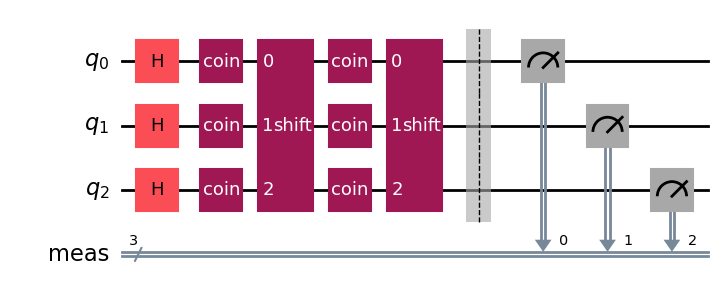

In [36]:
# Parameters
num_qubits = 3
num_steps = 2

# Create the quantum walk circuit
qc = create_quantum_walk_circuit(num_qubits, num_steps)

# Display the circuit diagram
display(qc.draw('mpl'))  # Colab-friendly circuit visualization

## Simulating the Quantum Walk and Viewing the Results

We use Qiskit's Aer's simulator backend to execute the circuit.
- The circuit is transpiled for the simulator.
- The simulation is run for 1000 shots.
- The output measurement counts are plotted as a histogram.

Counts: {'100': 122, '000': 134, '010': 125, '001': 120, '110': 114, '011': 122, '111': 128, '101': 135}


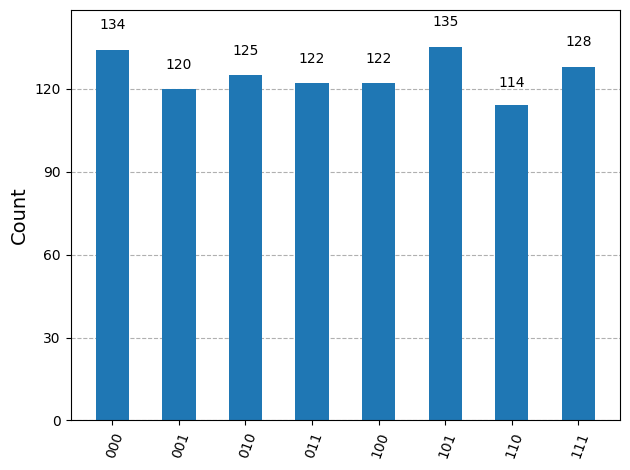

In [37]:
# Run the simulation
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

# Extract and display results
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)